In [67]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from matplotlib.patches import Circle
import os

In [68]:
homedir = os.getenv("HOME")

#general Virgo v2 table
vf_full = Table.read(homedir+'/v2_snrcoadd.fits')
#general Virgo v2 env table
env_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')

vf = vf_full[vf_full['sgacut_flag']]
env = env_full[vf_full['sgacut_flag']]

In [69]:
#divide subsample into environments
vf_cluster = vf[env['cluster_member']]
vf_rg = vf[env['rich_group_memb']]   #only galaxies in rich groups --> not in filaments, etc.
vf_fil = vf[env['filament_member']]
vf_pg = vf[env['poor_group_memb']]
vf_field = vf[env['pure_field']]

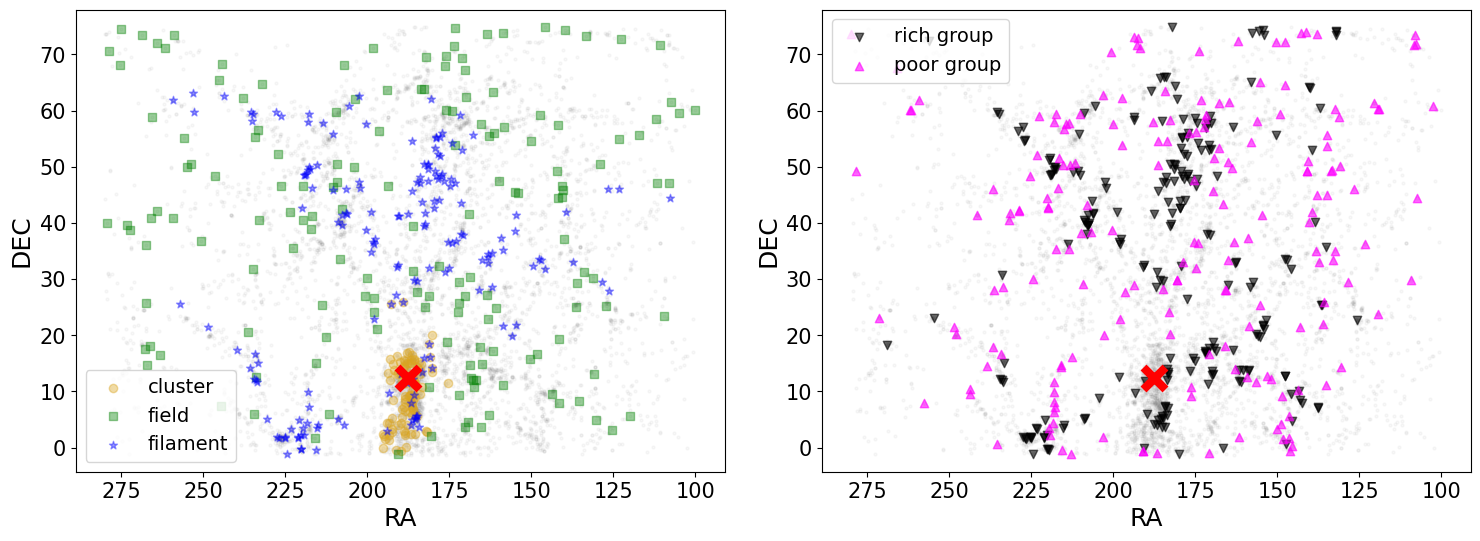

In [70]:
vf_env = [vf_cluster,vf_field,vf_fil]
vf_group = [vf_rg,vf_pg]
vf_label = ['cluster','field','filament']
group_label = ['rich group','poor group']
markers = ['o','s','*']
markers_group = ['v','^']
vf_color=['goldenrod','green','blue']
group_color=['black','magenta']

fig=plt.figure(figsize=(18,6))

plt.subplots_adjust(hspace=.2,wspace=.15)
        
for n in range(0,2):
    ax=fig.add_subplot(1,2,n+1)

    ax.scatter(vf_full['RA_1'],vf_full['DEC_1'],s=5,alpha=0.05,color='gray')
    #ax.scatter([187.7],[12.34],color='black',marker='x',s=100)
    
    plt.gca().invert_xaxis()
    plt.ylabel('DEC',fontsize=18)
    plt.xlabel('RA',fontsize=18)
    if n==0:
        for i in range(len(vf_env)):
            plt.scatter(vf_env[i]['RA_1'],vf_env[i]['DEC_1'],marker=markers[i],
                        label=vf_label[i],alpha=0.4,color=vf_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
    if n==1:
        for i in range(len(vf_group)):
            plt.scatter(vf_group[i]['RA_1'],vf_group[i]['DEC_1'],marker=markers_group[i],
                        label=group_label[i],alpha=0.6,color=group_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
        
    ax.scatter([187.7],[12.34],color='red',marker='x',s=250, linewidths=6)
    plt.ylim(np.min(vf_full['DEC_1'])-3,np.max(vf_full['DEC_1'])+3)
    ax.legend(fontsize=14)


plt.savefig(homedir+'/Desktop/radec_env.png',dpi=150,bbox_inches='tight', pad_inches=0.2)

        
plt.show()

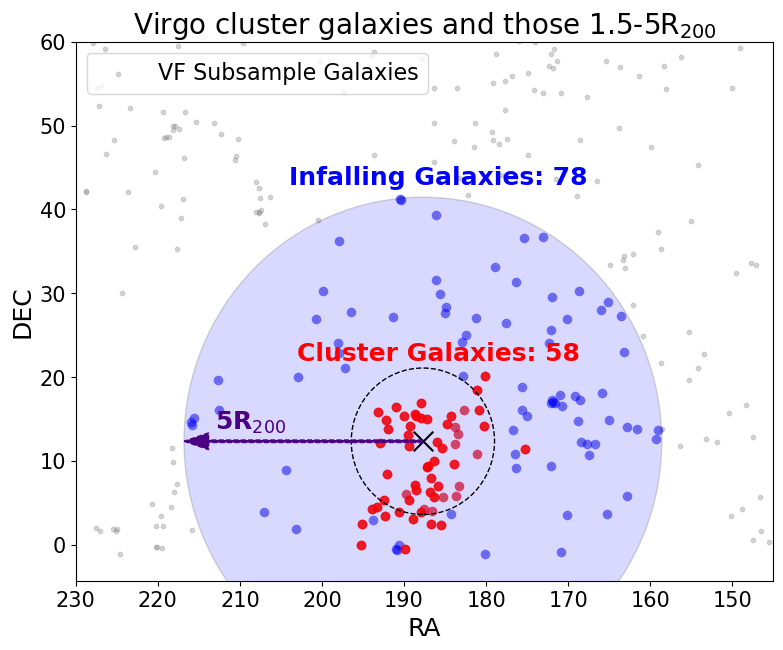

In [167]:
nser = Table.read(homedir+'/output_params_r_psf.fits')['nsersic']

RA_center = 187.70
DEC_center = 12.34
virial_radius = 5.8224 #(degrees)

onept5_vir = 1.5*virial_radius
five_vir = 5*virial_radius

fig, ax = plt.subplots(figsize=(9,7))
dist = np.sqrt((vf['RA_1']-RA_center)**2 + (vf['DEC_1']-DEC_center)**2)
virial_1pt5flag = (dist<=onept5_vir)
#virial_5flag = ((dist>virial_radius)&(dist<=five_vir))
virial_5flag = (dist>onept5_vir)&(dist<=five_vir)

clus_flag = (env['cluster_member']) | (virial_1pt5flag)
infall_flag = virial_5flag & (~env['cluster_member'])

plt.scatter(vf['RA_1'],vf['DEC_1'],alpha=0.3,s=10,color='gray',label='VF Subsample Galaxies')
#plt.scatter(vf['RA_1'][virial_1flag],vf['DEC_1'][virial_1flag],alpha=0.6,color='red')
plt.scatter(vf['RA_1'][infall_flag],vf['DEC_1'][infall_flag],alpha=0.4,color='blue')
plt.scatter(vf['RA_1'][clus_flag],vf['DEC_1'][clus_flag],alpha=0.6,color='red')

#circle_oneVR = plt.Circle((RA_center,DEC_center),virial_radius,facecolor='blue',edgecolor='black',alpha=0.15)
#ax.add_patch(circle_oneVR)
circle_fiveVR = plt.Circle((RA_center,DEC_center),virial_radius*5,facecolor='blue',edgecolor='black',alpha=0.15)
ax.add_patch(circle_fiveVR)

plt.scatter(vf['RA_1'][env['cluster_member']],vf['DEC_1'][env['cluster_member']],alpha=0.6,color='red')

plt.title(r'Virgo cluster galaxies and those 1.5-5R$_{200}$',fontsize=20)

plt.ylim(np.min(vf_full['DEC_1'])-3,60)
plt.xlim(230,145)

plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)

ax.scatter([187.7],[12.34],color='black',marker='x',s=200)

circle_onept5VR = plt.Circle((RA_center,DEC_center),virial_radius*1.5,facecolor='none',edgecolor='black',linestyle='--')
ax.add_patch(circle_onept5VR)

plt.arrow(RA_center, DEC_center, five_vir, 0, color='indigo', linestyle="--", length_includes_head=True,
          head_width=2, head_length=3, width=0.3)
plt.text(213,13.8,r'5R$_{200}$',color='indigo',fontsize=18,weight='bold')

#plt.text(204,43,f'Infalling Galaxies: {len(vf[infall_flag & (nser<2)])}',color='blue',weight='bold',fontsize=18)
#plt.text(203,22,f'Cluster Galaxies: {len(vf[clus_flag & (nser<2)])}',color='red',weight='bold',fontsize=18)

plt.text(204,43,f'Infalling Galaxies: {len(vf[infall_flag])}',color='blue',weight='bold',fontsize=18)
plt.text(203,22,f'Cluster Galaxies: {len(vf[clus_flag])}',color='red',weight='bold',fontsize=18)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)    

plt.legend(fontsize=16,loc='upper left')

#plt.savefig(homedir+'/Desktop/VF_infallcore.png', bbox_inches='tight', pad_inches=0.2, dpi=100)

#len(vf[env['cluster_member']&(nser<2)])

plt.show()

------------

In [72]:
#data analysis

Convolution:  True
No GALFIT data for 8 w3 galaxies and 2 r galaxies.
Total number of galaxies with GALFIT errors or error flags: 76
Total number of galaxies (including those with errors/error flags): 508


<Figure size 640x480 with 0 Axes>

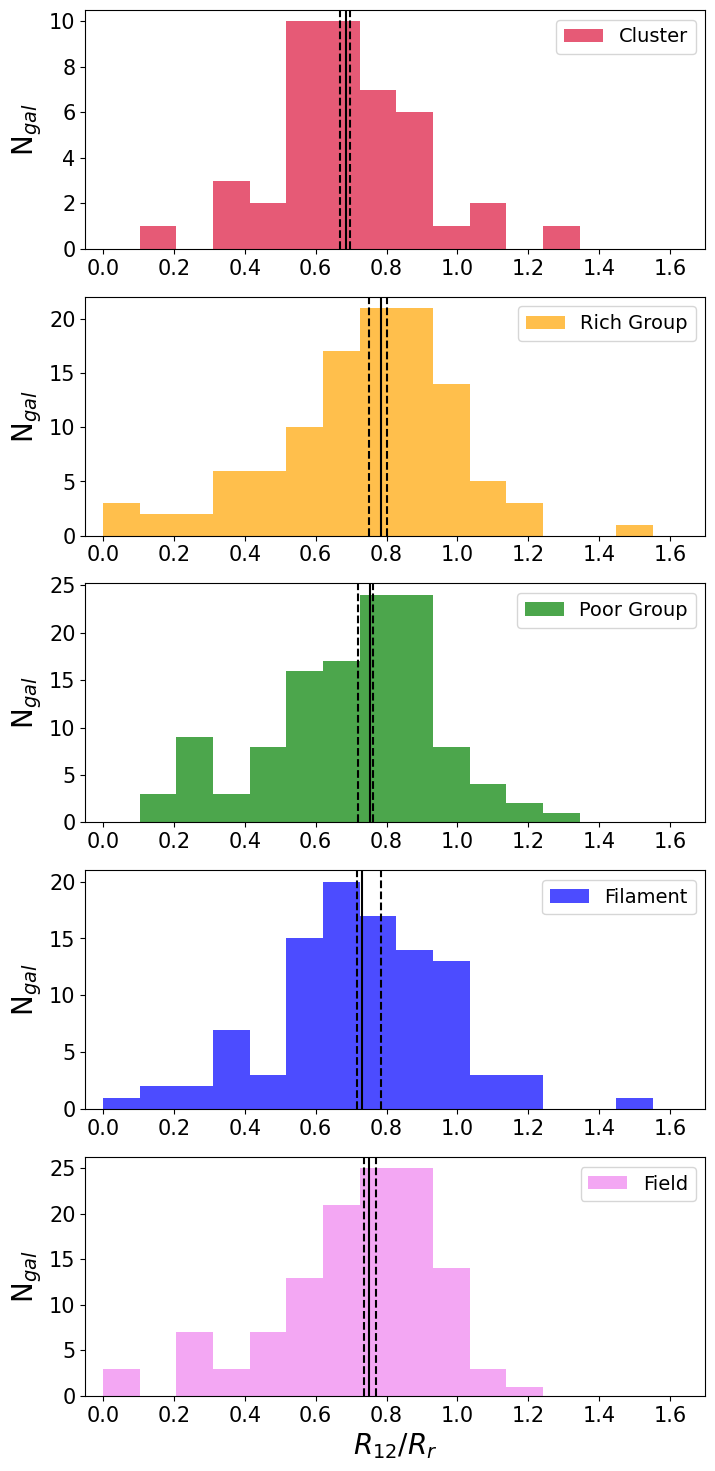

K-S p-value (> 0.003 (3sigma), "same distribution"):
('Cluster', 'Rich Group')
0.02404
('Cluster', 'Poor Group')
0.13744
('Cluster', 'Filament')
0.14921
('Cluster', 'Field')
0.05405
('Rich Group', 'Poor Group')
0.27897
('Rich Group', 'Filament')
0.88062
('Rich Group', 'Field')
0.60228
('Poor Group', 'Filament')
0.55802
('Poor Group', 'Field')
0.94080
('Filament', 'Field')
0.74793


In [290]:
#no more error text. >:/
import warnings
warnings.filterwarnings('ignore')

%run ~/github/research/data_analysis/re_analysis.py
cat = catalogs(conv=True,MeanMedian='median',MADmultiplier=5000,cutAGN=False,W1=False)

#cat.r12_vs_rstar(sfr_mstar='sfr',savefig=False)
#cat.r12_vs_rstar(sfr_mstar='mstar',savefig=True)

#cat.env_means(mass_match=False,trimOutliers=False,errtype='bootstrap',savefig=False)   #for MADmultiplier=5000 and trimOutliers=True, removes the pesky outlier galaxy
#cat.env_means_comp(savefig=False,trimOutliers=False,errtype='sterr')

#cat.mass_hist(z0mgs_comp=False,savefig=True)
#cat.envbins(savefig=False)
#cat.compareSGA(savefig=True)

#cat.sfrmstar_magphys(show_HI=False,show_sizerat=True,show_D25=False,savefig=True)
#cat.sfrmstar_z0mgs(show_HI=False,show_sizerat=False,show_D25=True,savefig=True)
#cat.ratio_MS(showHI=False,savefig=True)

cat.hist_dist_rats(savefig=True)
#cat.mass_hist_oneplot(fullsample=False,savefig=True)

#cat.wisesize_mass(nbins=5,savefig=True)

#cat.inclination_check(savefig=False)
#cat.mass_completeness_check(savefig=False)
#cat.mass_matching()

In [232]:
#%run LCS_comparison.py
#lcs=catalogs(conv=True,MeanMedian='median',cutAGN=False)
#lcs.LCS_hist(ReDisk='Disk',savefig=True)
#lcs.LCS_hist(ReDisk='Re',savefig=True)
#lcs.wisesize_hist(savefig=True)
#lcs.LCS_mass(ReDisk='Re',savefig=True)
#lcs.LCS_mass(ReDisk='Disk',savefig=True)
#lcs.wisesize_mass(nbins=3,savefig=True)

In [12]:
#TROUBLE may instead be a consequence of the psf filename length...causes some sort of overflow/memory leak?

#nope. the problem was the PSF_oversampling parameter. I was claiming 8, which GALFIT treated as meaning that
#the psf pixscale was 1/8 that of the cutout. This wee trouble also accounts for why GALFIT ran for 702 galaxies
#in ~2 days (in series), as the program had to convolve, say, eight-times as much as when the pixscale=1.
#and the relative linear relation between the nopsf and psf data suggests that the interpreted pixscale 
#rendered the psf's effects...negligible? 
#I'm guessing the triviality of convolution declines as the psf's size declines.

In [13]:
magphys = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')
magphys_cut = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')[(magphys['magphysFlag']) & (vf_full['sgacut_flag'])]
magphys = magphys[(magphys['magphysFlag'])]

In [14]:
def colormass(x1,y1,x2,y2,name1,name2, figname='test',contourflag=False, \
             xmin=6, xmax=11.6, ymin=-3, ymax=2, contour_bins = 40, ncontour_levels=5,\
              xlabel=r'$\rm \log_{10}(M_\star/M_\odot) $', ylabel=r'$\rm \log_{10}(SFR/(M_{\odot}/yr)) $', 
              color1='black',color2='red',\
              nhistbin=50, alpha1=.4,alphagray=.01,marker2='o',\
              plot_top_histogram=True):

    if plot_top_histogram:
        fig = plt.figure(figsize=(8,8))
    else:
        fig = plt.figure(figsize=(8,5))
    
    
    plt.subplots_adjust(left=.15,bottom=.15)
    if plot_top_histogram:
        nrow = 4
        ncol = 4
    else:
        nrow = 3
        ncol = 4
    
    # for purposes of this plot, only keep data within the 
    # window specified by [xmin:xmax, ymin:ymax]
    
    keepflag1 = (x1 >= xmin) & (x1 <= xmax) & (y1 >= ymin) & (y1 <= ymax)
    keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
    
    x1 = x1[keepflag1]
    y1 = y1[keepflag1]
    
    x2 = x2[keepflag2]
    y2 = y2[keepflag2]
    n1 = sum(keepflag1)
    n2 = sum(keepflag2)
    
    if plot_top_histogram:
        ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
    else:
        ax1 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=nrow,colspan=ncol-1, fig=fig)        

    label=name1
        
    plt.plot(x1,y1,'k.',alpha=alphagray,label=label, zorder=1,markersize=8)        
    
    label=name2
    plt.plot(x2,y2,'ro',alpha=alpha1, label=label,markersize=8,mec='k')
        
    plt.legend(loc='upper left',fontsize=13)

    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=26)
    plt.ylabel(ylabel,fontsize=26)
    plt.gca().tick_params(axis='both', labelsize=16)

    # add the top histogram
    if plot_top_histogram:
        ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1) #, yticks=[]
        print('just checking ...',len(x1),len(x2))
        print(min(x1))
        print(min(x2))
        minx = min([min(x1),min(x2)])
        maxx = max([max(x1),max(x2)])    
        mybins = np.linspace(minx,maxx,nhistbin)
        
        t = plt.hist(x1, density=False, bins=mybins,color=color1,histtype='step',lw=1.5, label=name1)
        t = plt.hist(x2, density=False, bins=mybins,color=color2,histtype='step',lw=1.5, label=name2)

        ax2.xaxis.tick_top()
        ax2.tick_params(axis='both', labelsize=16)


    # add the side histogram
    if plot_top_histogram:
        ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1)
    else:
        ax3 = plt.subplot2grid((nrow,ncol),(0,ncol-1),rowspan=nrow,colspan=1, fig=fig, sharey = ax1)      
    miny = min([min(y1),min(y2)])
    maxy = max([max(y1),max(y2)])    
    mybins = np.linspace(miny,maxy,nhistbin)

    
    t=plt.hist(y1, density=False, orientation='horizontal',bins=mybins,color=color1,histtype='step',lw=1.5, label=name1)
    t=plt.hist(y2, density=False, orientation='horizontal',bins=mybins,color=color2,histtype='step',lw=1.5, label=name2)

    plt.yticks(rotation='horizontal')
    ax3.yaxis.tick_right()
    ax3.tick_params(axis='both', labelsize=16)

just checking ... 6139 551
5.701999474889637
6.244277120801843


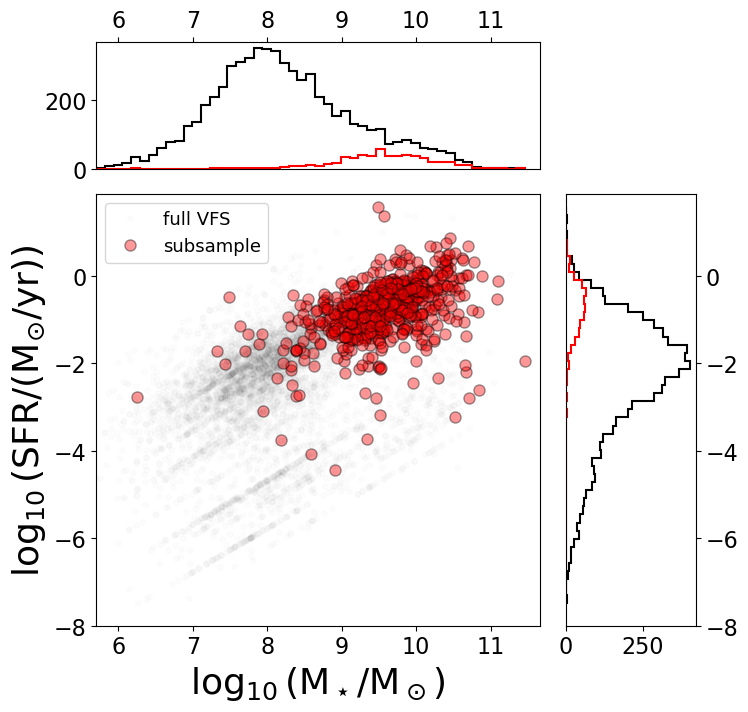

In [15]:
x1=magphys['logMstar']
y1=magphys['logSFR']
x2=magphys_cut['logMstar']
y2=magphys_cut['logSFR']
name1='full VFS'
name2='subsample'

colormass(x1,y1,x2,y2,name1,name2,
          xmin=5.7,xmax=np.max(x2)+0.2,ymin=-8,ymax=np.max(y2)+0.3,figname='test')

- ran 500 iterations of mass-matching, calculated size ratio medians for each environment bin (meaning I would have 500 medians for each bin, corresponding to the sizes of mass-matched galaxies after each iteration). I then evaluated the median of these medians and plotted this with standard deviation. I did likewise with the "means" of the medians with standard deviations, showing the spread of possible mean/medians values arising from mass-matching. 

- the cluster mean/median median is consistent, as to be expected. no error bars attached to the mean or median plot, given that there is no randomness associated with the choosing of the cluster galaxies (all other galaxies chosen randomly from a pool to match with the cluster galaxies).

- comparing the current median size ratio WRT environment plot to this median-of-medians figure, there is consistency (nearly not the case for the group galaxies). The mean is not as consistent.

In [2]:
#no more error text. >:/
import warnings
warnings.filterwarnings('ignore')

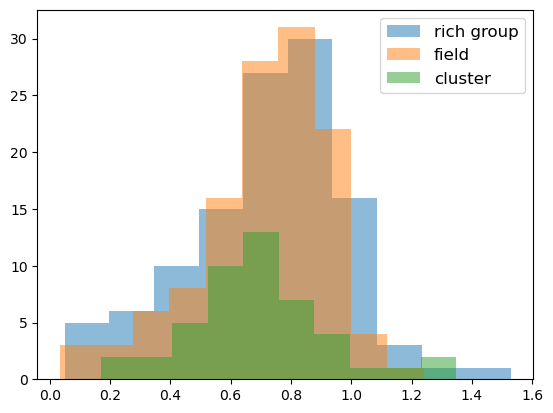

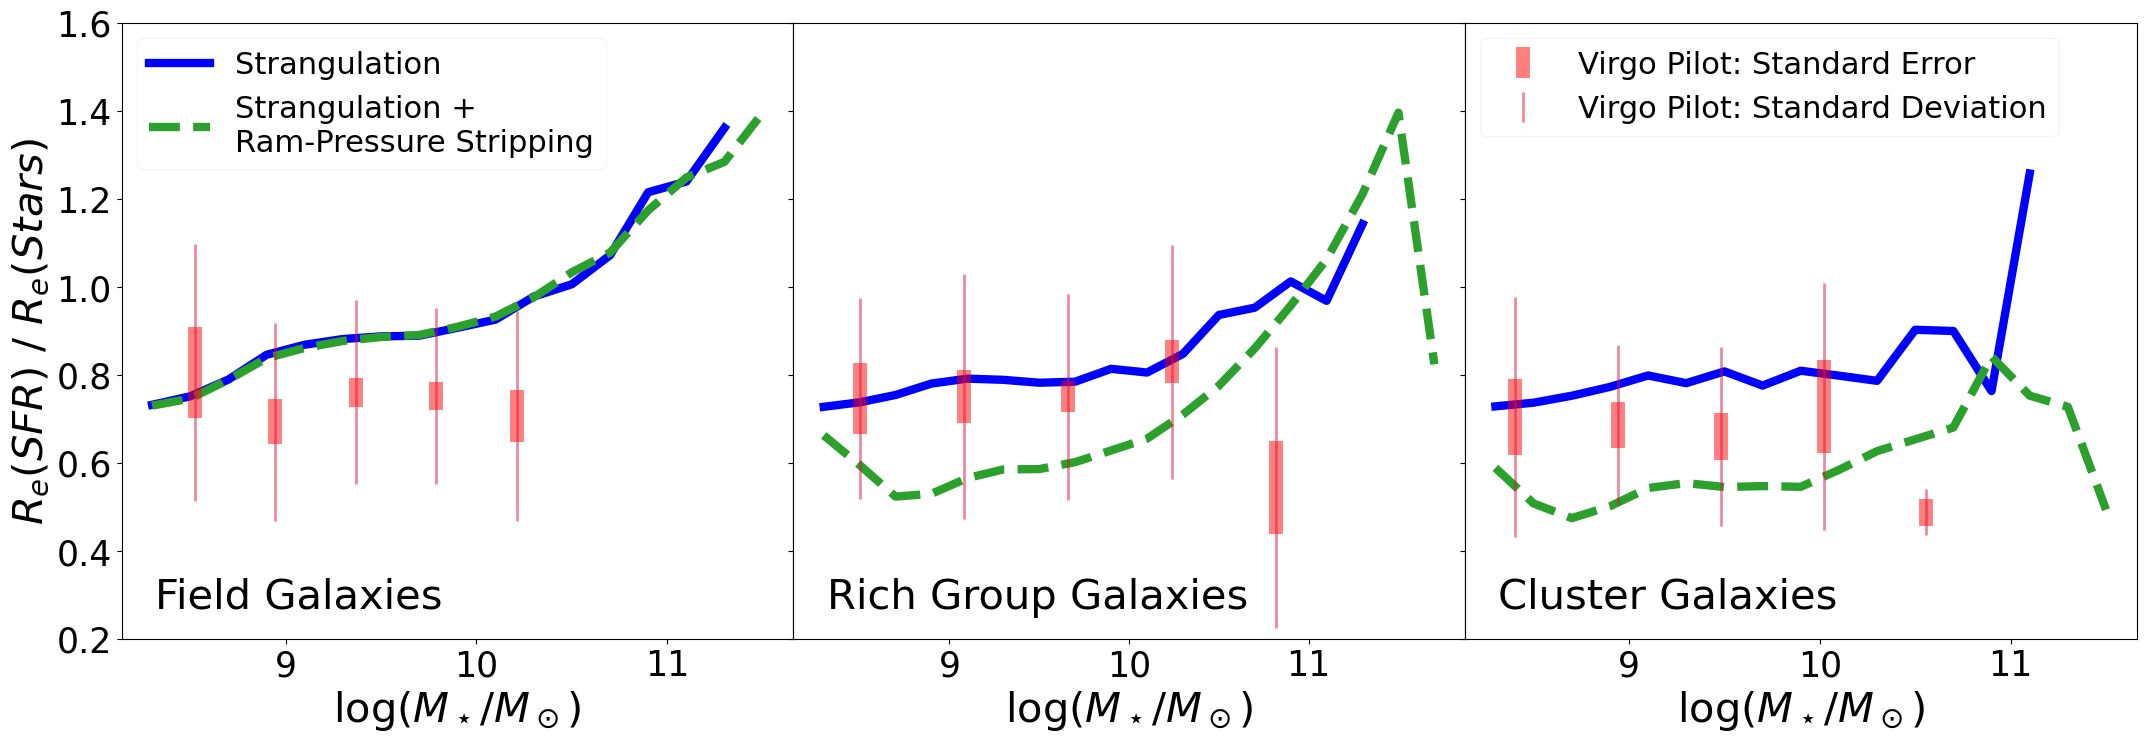

<Figure size 640x480 with 0 Axes>

In [293]:
#VFS masses from magphys

#LCS --> Re size ratio
#Masses from John Moustakas' SED fitting
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_data.py

Errors (VFS):

- STDs from scipy.stats.binned_statistic, calculated using size ratios in each mass bin
- divided by sqrt of number of galaxies in each bin

Did likewise for WISESize, but number of galaxies in each bin found by calculating the ratio of VFS galaxies in each bin divided by the total number of VFS subsample galaxies, multiplied by the total expected number of WISESize galaxies

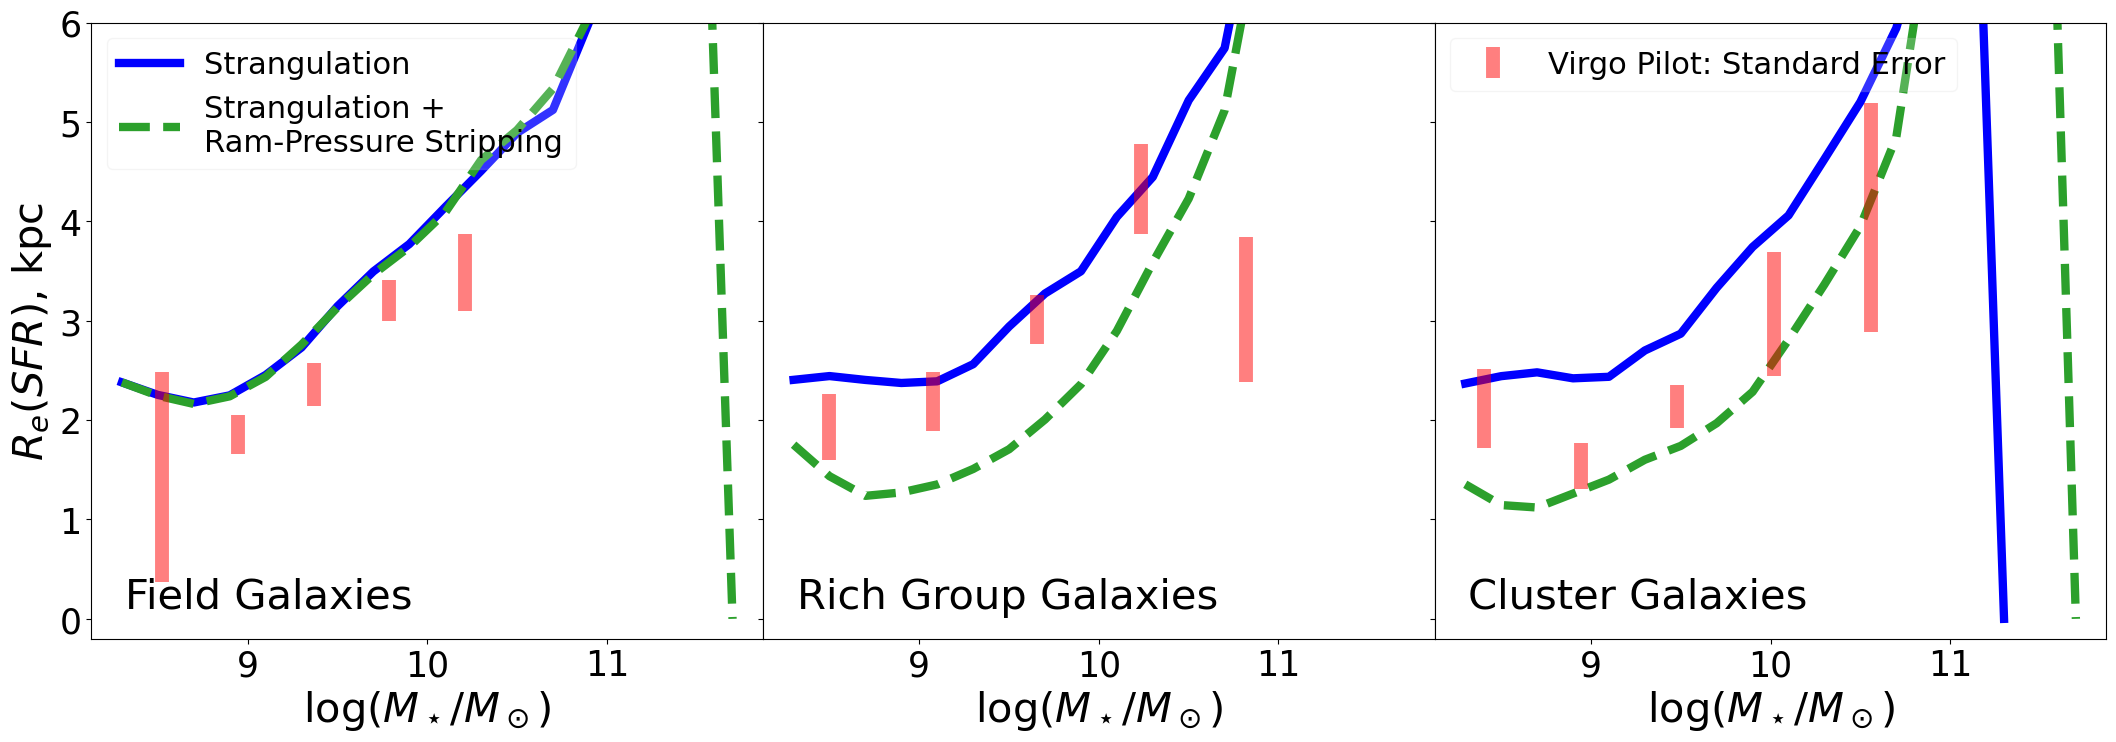

<Figure size 640x480 with 0 Axes>

In [159]:
#VFS masses from magphys

#LCS --> Re size ratio
#Masses from John Moustakas' SED fitting
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_sfr.py

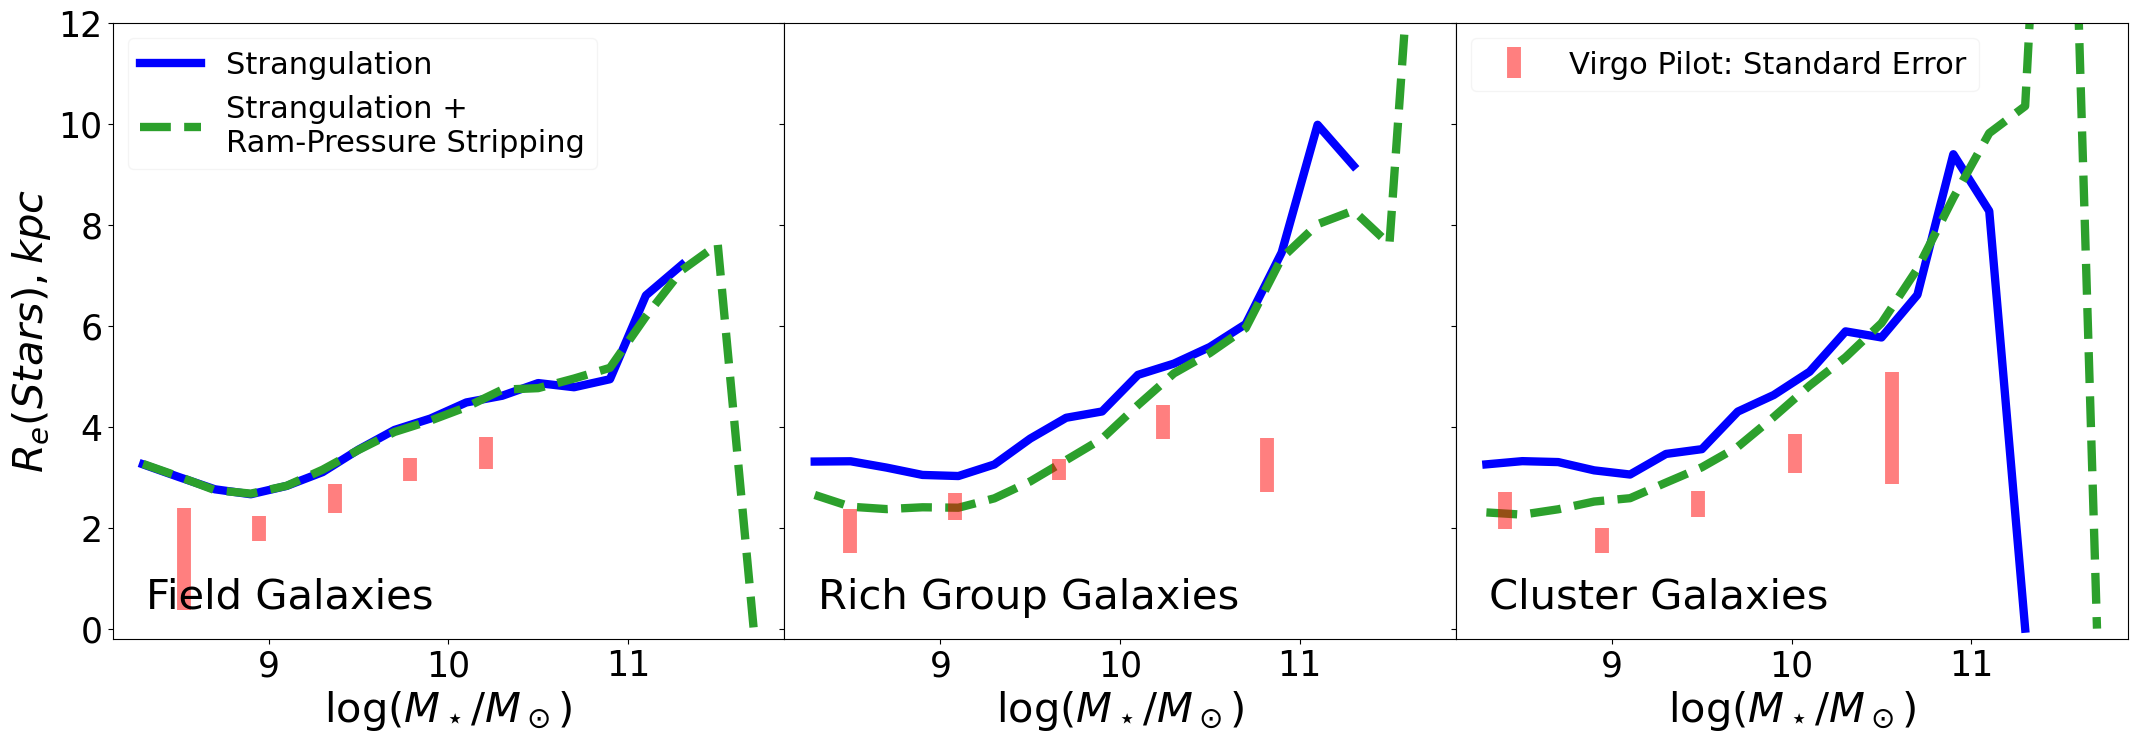

<Figure size 640x480 with 0 Axes>

In [292]:
#VFS masses from magphys

#LCS --> Re size ratio
#Masses from John Moustakas' SED fitting
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_mstar.py